# Matrix Factorization via Singular Value Decomposition

SVD is an algorithm that decomposes a matrix $R$ into the best lower rank (i.e. smaller/simpler) approximation of the original matrix $R$. Mathematically, it decomposes R into a two unitary matrices and a diagonal matrix:

$$\begin{equation}
R = U\Sigma V^{T}
\end{equation}$$

where R is users's ratings matrix, $U$ is the user "features" matrix, $\Sigma$ is the diagonal matrix of singular values (essentially weights), and $V^{T}$ is the movie "features" matrix. $U$ and $V^{T}$ are orthogonal, and represent different things. $U$ represents how much users "like" each feature and $V^{T}$ represents how relevant each feature is to each movie.

To get the lower rank approximation, we take these matrices and keep only the top $k$ features, which we think of as the underlying tastes and preferences vectors.


In [145]:
import pandas as pd
import numpy as np

# Get Data

Get data from [MovieLens](https://grouplens.org/datasets/movielens/). Download MoiveLens 1M dataset and put it in `./dataset`

In [146]:
# Ratings
ratings_df = pd.read_csv('./dataset/ratings.dat', sep="::", header=None, 
                         names=['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype=int, 
                         engine='python')
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [147]:
np.unique(ratings_df['Rating'].values)

array([1, 2, 3, 4, 5])

In [148]:
ratings_df['UserID'].unique().shape

(6040,)

In [149]:
ratings_df.shape

(1000209, 4)

In [150]:
# Users
users_df = pd.read_csv('./dataset/users.dat', sep="::", header=None, 
                       names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], engine='python')
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [151]:
users_df.shape

(6040, 5)

In [152]:
# Movies
movies_df = pd.read_csv('./dataset/movies.dat', sep="::", header=None, 
                       names=['MovieID', 'Title', 'Genres'], engine='python')
movies_df['MovieID'] = movies_df['MovieID'].apply(pd.to_numeric)
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


<h1> Analysis </h1>

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

In [154]:
merge_df = ratings_df.merge(movies_df, how='left', left_on='MovieID', right_on='MovieID')
merge_df.head(10)

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
5,1,1197,3,978302268,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance
6,1,1287,5,978302039,Ben-Hur (1959),Action|Adventure|Drama
7,1,2804,5,978300719,"Christmas Story, A (1983)",Comedy|Drama
8,1,594,4,978302268,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical
9,1,919,4,978301368,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical


In [155]:
merge_df.groupby('Title')['Rating'].mean().sort_values(ascending=False).head(10)

Title
Gate of Heavenly Peace, The (1995)           5.0
Lured (1947)                                 5.0
Ulysses (Ulisse) (1954)                      5.0
Smashing Time (1967)                         5.0
Follow the Bitch (1998)                      5.0
Song of Freedom (1936)                       5.0
Bittersweet Motel (2000)                     5.0
Baby, The (1973)                             5.0
One Little Indian (1973)                     5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Name: Rating, dtype: float64

In [156]:
merge_df.groupby('Title')['Rating'].count().sort_values(ascending=False).head(10)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: Rating, dtype: int64

In [157]:
cal_df = merge_df.groupby('Title')['Rating'].mean().to_frame()
cal_df['rating_numbers'] = merge_df.groupby('Title')['Rating'].count().to_frame()
cal_df.head(10)

,Rating,rating_numbers
Title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199
1-900 (1994),2.500000,2
10 Things I Hate About You (1999),3.422857,700
101 Dalmatians (1961),3.596460,565
101 Dalmatians (1996),3.046703,364


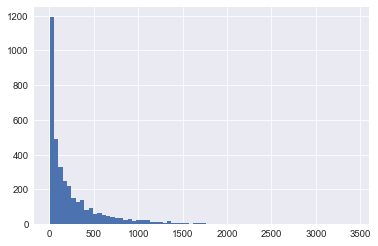

In [158]:
cal_df['rating_numbers'].hist(bins=70)

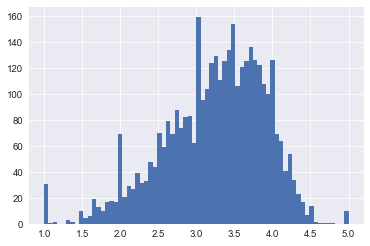

In [159]:
cal_df['Rating'].hist(bins=70)

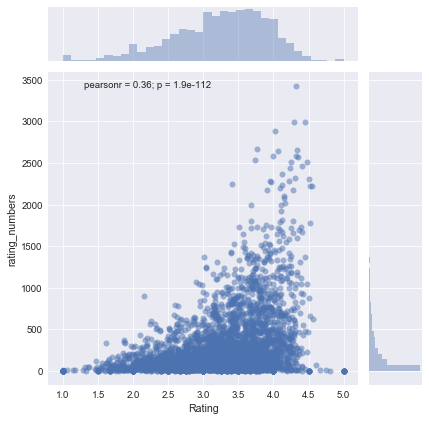

In [160]:
sns.jointplot(x='Rating', y='rating_numbers', data=cal_df, alpha=0.5)

# Construct Rating Matrix

In [161]:
R_df = ratings_df.pivot(index='UserID', columns='MovieID', values='Rating').fillna(0)
R_df.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
# De-mean the data (normalize by each users mean)
R = R_df.as_matrix()
user_ratings_mean = np.mean(R, axis=1)
print(user_ratings_mean.shape)
R_demeaned = R - user_ratings_mean.reshape(-1,1)

(6040,)


In [163]:
R_demeaned

array([[ 4.94009714, -0.05990286, -0.05990286, ..., -0.05990286,
        -0.05990286, -0.05990286],
       [-0.12924987, -0.12924987, -0.12924987, ..., -0.12924987,
        -0.12924987, -0.12924987],
       [-0.05369671, -0.05369671, -0.05369671, ..., -0.05369671,
        -0.05369671, -0.05369671],
       ..., 
       [-0.02050729, -0.02050729, -0.02050729, ..., -0.02050729,
        -0.02050729, -0.02050729],
       [-0.1287102 , -0.1287102 , -0.1287102 , ..., -0.1287102 ,
        -0.1287102 , -0.1287102 ],
       [ 2.6708041 , -0.3291959 , -0.3291959 , ..., -0.3291959 ,
        -0.3291959 , -0.3291959 ]])

# Singular Value Decomposition

In [164]:
from scipy.sparse.linalg import svds

In [165]:
latent = 50 # rank
U, Sigma, Vt = svds(R_demeaned, k=latent)

In [166]:
Sigma # singular value

array([  147.18581225,   147.62154312,   148.58855276,   150.03171353,
         151.79983807,   153.96248652,   154.29956787,   154.54519202,
         156.1600638 ,   157.59909505,   158.55444246,   159.49830789,
         161.17474208,   161.91263179,   164.2500819 ,   166.36342107,
         166.65755956,   167.57534795,   169.76284423,   171.74044056,
         176.69147709,   179.09436104,   181.81118789,   184.17680849,
         186.29341046,   192.15335604,   192.56979125,   199.83346621,
         201.19198515,   209.67692339,   212.55518526,   215.46630906,
         221.6502159 ,   231.38108343,   239.08619469,   244.8772772 ,
         252.13622776,   256.26466285,   275.38648118,   287.89180228,
         315.0835415 ,   335.08085421,   345.17197178,   362.26793969,
         415.93557804,   434.97695433,   497.2191638 ,   574.46932602,
         670.41536276,  1544.10679346])

# Making Predictions from the Decomposed Matrices

In [167]:
all_user_predicted_ratings =  U @ np.diag(Sigma) @ Vt + user_ratings_mean.reshape(-1,1)

In [169]:
def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
RMSE(all_user_predicted_ratings, R)

0.56285150072441081

# Making Movie Recommendations

In [33]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=R_df.columns)
preds_df.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.288861,0.143055,-0.195080,-0.018843,0.012232,-0.176604,-0.074120,0.141358,-0.059553,-0.195950,...,0.027807,0.001640,0.026395,-0.022024,-0.085415,0.403529,0.105579,0.031912,0.050450,0.088910
1,0.744716,0.169659,0.335418,0.000758,0.022475,1.353050,0.051426,0.071258,0.161601,1.567246,...,-0.056502,-0.013733,-0.010580,0.062576,-0.016248,0.155790,-0.418737,-0.101102,-0.054098,-0.140188
2,1.818824,0.456136,0.090978,-0.043037,-0.025694,-0.158617,-0.131778,0.098977,0.030551,0.735470,...,0.040481,-0.005301,0.012832,0.029349,0.020866,0.121532,0.076205,0.012345,0.015148,-0.109956
3,0.408057,-0.072960,0.039642,0.089363,0.041950,0.237753,-0.049426,0.009467,0.045469,-0.111370,...,0.008571,-0.005425,-0.008500,-0.003417,-0.083982,0.094512,0.057557,-0.026050,0.014841,-0.034224
4,1.574272,0.021239,-0.051300,0.246884,-0.032406,1.552281,-0.199630,-0.014920,-0.060498,0.450512,...,0.110151,0.046010,0.006934,-0.015940,-0.050080,-0.052539,0.507189,0.033830,0.125706,0.199244


In [52]:
np.array(preds_df.iloc[836].sort_values(ascending=False).index)

C:\Users\tsunh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [40]:
np.array(ratings_df[ratings_df.UserID==(837)]["MovieID"])

array([1248, 2991, 1252,  589,    6, 1267, 1276, 1292,  905,  910, 1446,
        913, 3068, 1610, 1617,  942, 3083, 2289,  955, 3095, 3417, 3418,
       3435,  296, 3654, 2858,  457, 3683, 1304, 1177, 1179, 1188, 3101,
       2300, 2186, 1387,  858, 3307,  110, 3341, 3504, 3362, 3366, 2571,
        164, 2726, 1783,  318, 2599, 1961,   34, 1036, 3720, 3735, 2935,
       2791, 2000, 1201, 2944, 2947, 2948, 2949, 1213, 1221, 1222, 2028,
       1233,  707, 1244])

In [61]:
# Recommend top five (num_recommendations) movies
# Return: Top five movies that user has already rated and top five recommend movies
def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    
    # UserID starts at 1
    sorted_user_predictions = np.array(preds_df.iloc[user_row_number].sort_values(ascending=False).index)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.UserID==(userID)]
    # TODO
    user_full = np.array(ratings_df[ratings_df.UserID==(userID)]["MovieID"])
    
    print('User {0} has already rated {1} movies.'.format(userID, len(user_full )))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    # TODO
    recommendations = [i for i in sorted_user_predictions if i not in user_full][:num_recommendations]
    return user_full, recommendations

In [62]:
already_rated, predictions = recommend_movies(preds_df, 837, movies_df, ratings_df, 10)

User 837 has already rated 69 movies.
Recommending highest 10 predicted ratings movies not already rated.


In [63]:
already_rated[:10]

array([1248, 2991, 1252,  589,    6, 1267, 1276, 1292,  905,  910])

In [64]:
predictions

[527, 1953, 608, 1284, 2194, 1230, 1242, 922, 1954, 593]

# Reference
https://beckernick.github.io/matrix-factorization-recommender/

hw1-1

In [94]:
A = np.array([[1,1,1,1],[1,0,-2,1],[1,-1,1,1]], dtype = np.float32)
A

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  0., -2.,  1.],
       [ 1., -1.,  1.,  1.]], dtype=float32)

In [177]:
A @ A.T

array([[ 4.,  0.,  2.],
       [ 0.,  6.,  0.],
       [ 2.,  0.,  4.]], dtype=float32)

In [95]:
U, S, V = np.linalg.svd(A)

In [108]:
print(U)

[[ -1.98602730e-16  -7.07106769e-01   7.07106769e-01]
 [ -1.00000000e+00  -7.02166689e-17  -2.10650013e-16]
 [  3.97205460e-16  -7.07106769e-01  -7.07106769e-01]]


In [109]:
print(S)

[ 2.44948983  2.44948983  1.41421354]


In [110]:
print(V)

[[ -4.08248305e-01   1.48741682e-17   8.16496611e-01  -4.08248305e-01]
 [ -5.77350259e-01  -1.99733347e-16  -5.77350259e-01  -5.77350259e-01]
 [ -2.53918375e-17   1.00000000e+00  -9.17916370e-17  -7.34659071e-17]
 [ -7.07106769e-01   2.77555756e-17  -5.55111512e-17   7.07106769e-01]]


In [144]:
(1/0.57777)**2

2.995642781555707

In [ ]:
V = np.array([[2/np.sqrt(12),';,']])

In [139]:
[[ 0,  -7.07106769e-01,   7.07106769e-01],
 [ -1.,              0,                0], 
 [ 0,  -7.07106769e-01,  -7.07106769e-01]] @ 
np.array([[ 2.44948983,  0.        ,  0.        , 0.],
       [ 0.        ,  2.44948983,  0.        , 0.],
       [ 0.        ,  0.        ,  1.41421354, 0.]]) @ 

array([[ -1.00000000e+00,   9.99999967e-01,  -1.00000000e+00,
         -1.00000000e+00],
       [ -1.00000007e+00,   3.64341238e-17,   2.00000014e+00,
         -1.00000007e+00],
       [ -1.00000000e+00,  -9.99999967e-01,  -1.00000000e+00,
         -1.00000000e+00]])

In [85]:
U = np.array([[1/(2**0.5),0,-1/(2**0.5)], [0, 1, 0], [1/(2**0.5), 0,1/(2**0.5)]])
s = np.array([[2.449,0,0,0],[0,2.449,0,0],[0,0,1.4121,0]])
V = np.array([[1/(2**0.5),0,0,1/(2**0.5)],[0,1,0,0],[1/(2**0.5),0,0,-1/(2**0.5)],[0,0,1,0]])

In [130]:
np.concatenate((np.diag(S),np.array([[0,0,0]])),1)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [133]:
np.array([[ 2.44948983,  0.        ,  0.        , 0.],
       [ 0.        ,  2.44948983,  0.        , 0.],
       [ 0.        ,  0.        ,  1.41421354, 0.]])

NameError: name 'array' is not defined

In [97]:
np.diag(S)

array([[ 2.44948983,  0.        ,  0.        ],
       [ 0.        ,  2.44948983,  0.        ],
       [ 0.        ,  0.        ,  1.41421354]], dtype=float32)

In [103]:
B = np.array([[1.,1,1,1],[1,0,-2,1],[1,-1,1,1]])
B

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  0., -2.,  1.],
       [ 1., -1.,  1.,  1.]])

In [105]:
svds(B,2)

(array([[ 0.6394126 ,  0.30191312],
        [ 0.42696962, -0.90426597],
        [ 0.6394126 ,  0.30191312]]),
 array([ 2.44948974,  2.44948974]),
 array([[  6.96387819e-01,   4.53246652e-17,   1.73458963e-01,
           6.96387819e-01],
        [ -1.22654009e-01,  -1.13311663e-16,   9.84841098e-01,
          -1.22654009e-01]]))

In [173]:
B = np.array([[ 0,  -7.07106769e-01,   7.07106769e-01],
 [ -1.,              0,                0], 
 [ 0,  -7.07106769e-01,  -7.07106769e-01]] )

In [175]:
B.T @ B

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   9.99999966e-01,  -1.59241398e-17],
       [  0.00000000e+00,  -1.59241398e-17,   9.99999966e-01]])